Applied Statistics

Steps and tasks: 
1. Import the necessary libraries 
2. Read the data as a data frame 
3. Perform basic EDA which should include the following and print out your insights at every step.

> *   Shape of the data
*   Data type of each attribute 
*   Checking the presence of missing values 
*   5 point summary of numerical attributes 
*   Distribution of ‘bmi’, ‘age’ and ‘charges’ columns 
*   Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 
*   Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 
*   Distribution of categorical columns (include children) 
*   Pair plot that includes all the columns of the data frame 

4. Answer the following questions with statistical evidence

>*   Do charges of people who smoke differ significantly from the people who don't? 
*   Does bmi of males differ significantly from that of females? 
*   Is the proportion of smokers significantly different in different genders? 
*   Is the distribution of bmi across women with no children, one child and two children, the same? 


# Step 1: Importing important Libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Reading the data as Dataframe in "dataset"

In [ ]:
dataset = pd.read_csv("insurance (2).csv")

# Step 3a: Shape of Dataset

In [ ]:
print("Shape of dataset:",dataset.shape)

Shape of dataset: (1338, 7)


# Step 3b: Data type of each attribute

In [ ]:
print("Data type of each column:\n",dataset.dtypes)

Data type of each column:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


# Step 3c: Checking the presence of missing values

In [ ]:
print("Number of null values present in each column:\n",dataset.isnull().sum())

Number of null values present in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Step 3d: 5 point summary of numerical attributes

In [ ]:
numerical_attributes = dataset[["age", "bmi", "children", "charges"]]
percentiles_age = np.percentile(numerical_attributes.age,[25,50,75])
percentiles_bmi = np.percentile(numerical_attributes.bmi,[25,50,75])
percentiles_child = np.percentile(numerical_attributes.children,[25,50,75])
percentiles_charges = np.percentile(numerical_attributes.charges,[25,50,75])
min = numerical_attributes.min()
max = numerical_attributes.max()

print("Five Point Summary")
print("Minimum:\n",min,"\n")
print("Maximum:\n",max,"\n")
print("[25th, Median, 75th] Percentile of age:", percentiles_age)
print("[25th, Median, 75th] Percentile of bmi:", percentiles_bmi)
print("[25th, Median, 75th] Percentile of children:", percentiles_child)
print("[25th, Median, 75th] Percentile of charges:", percentiles_charges)

Five Point Summary
Minimum:
 age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64 

Maximum:
 age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64 

[25th, Median, 75th] Percentile of age: [27. 39. 51.]
[25th, Median, 75th] Percentile of bmi: [26.29625 30.4     34.69375]
[25th, Median, 75th] Percentile of children: [0. 1. 2.]
[25th, Median, 75th] Percentile of charges: [ 4740.28715   9382.033    16639.912515]


# Step 3e: Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

Distribution of 'bmi' column

In [ ]:
adults = dataset.age.apply(lambda x: x>=18 and x<60)
young = dataset.age.apply(lambda x: x<18)
senior_citizen = dataset.age.apply(lambda x: x>=60)
print("Beneficiaries that are not adult yet:",young.sum())
print("Beneficiaries that are adult:", adults.sum())
print("Beneficiaries that are senior citizen:", senior_citizen.sum())

Beneficiaries that are not adult yet: 0
Beneficiaries that are adult: 1224
Beneficiaries that are senior citizen: 114


Distribution of 'age' column

In [ ]:
ideal_bmi = dataset.bmi.apply(lambda x: x>=18.5 and x<=24.9)
under_weight = dataset.bmi.apply(lambda x: x<18.5)
obese = dataset.bmi.apply(lambda x: x>24.9)

print("Beneficiaries having ideal bmi:",ideal_bmi.sum())
print("Beneficiaries that are Under-weight:", under_weight.sum())
print("Beneficiaries that are Obese/Over-weight:", obese.sum())

Beneficiaries having ideal bmi: 222
Beneficiaries that are Under-weight: 20
Beneficiaries that are Obese/Over-weight: 1096


Distribution of 'charges' column

In [ ]:
low_charges = dataset.charges.apply(lambda x: x<=2000)
medium_charges = dataset.charges.apply(lambda x: x>2000 and x<=10000)
high_charges = dataset.charges.apply(lambda x: x>10000 and x<=25000)
max_charges = dataset.charges.apply(lambda x: x>25000)

print("Individual medical costs billed by health insurance: ")
print("cost >=2000:",low_charges.sum())
print("2000< cost<=10000:", medium_charges.sum())
print("10000< cost <=25000:", high_charges.sum())
print("cost >25000:",max_charges.sum())

Individual medical costs billed by health insurance: 
cost >=2000: 92
2000< cost<=10000: 620
10000< cost <=25000: 425
cost >25000: 201


# 3f: Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

In [ ]:
bmi_skew = dataset.bmi.skew(axis=0)
age_skew = dataset.age.skew(axis=0)
charges_skew = dataset.charges.skew(axis=0)

print('Skewness of "bmi":', bmi_skew)
print('Skewness of "age":', age_skew)
print('Skewness of "charges":', charges_skew)

Skewness of "bmi": 0.2840471105987448
Skewness of "age": 0.05567251565299186
Skewness of "charges": 1.5158796580240388


# 3g: Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [ ]:
def outlier_detection(column,percentiles_col):
  quartile_range = percentiles_col[2]-percentiles_col[0]
  upper_bound = column >=(percentiles_col[2] + 1.5*quartile_range)
  lower_bound = column <=(percentiles_col[0] - 1.5*quartile_range)
  return quartile_range,upper_bound,lower_bound


The box plot in the next cell shows that there are outliers present in the 'bmi' column. all of the outliers are present above higher bound. I also calculated the positions of outliers using Inter Quartile Range.

Inter Quartile Range: 8.3975
Outliers below lower bound: (array([], dtype=int64),)
Outliers above upper bound: (array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317]),) 

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


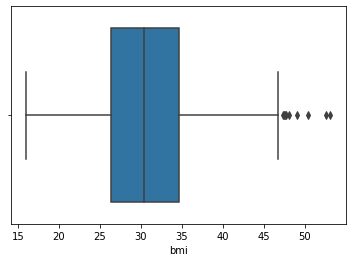

In [ ]:
bmi_qrange,bmi_upper,bmi_lower = outlier_detection(dataset.bmi,percentiles_bmi)

print("Inter Quartile Range:",bmi_qrange)
print("Outliers below lower bound:",np.where(bmi_lower))
print("Outliers above upper bound:",np.where(bmi_upper),"\n")
print(sns.boxplot(dataset.bmi))

There are no outliers in 'age' column.

Inter Quartile Range: 24.0
Outliers below lower bound: (array([], dtype=int64),)
Outliers above upper bound: (array([], dtype=int64),) 

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


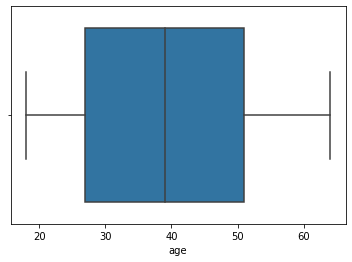

In [ ]:
age_qrange,age_upper,age_lower = outlier_detection(dataset.age,percentiles_age)
print("Inter Quartile Range:",age_qrange)
print("Outliers below lower bound:",np.where(age_lower))
print("Outliers above upper bound:",np.where(age_upper),"\n")
print(sns.boxplot(dataset.age))

There is a very high number of data point above the upper bound in 'charges' column.

Inter Quartile Range: 11899.625365
Outliers below lower bound: (array([], dtype=int64),)
Outliers above upper bound: (array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
         82,   84,   86,   94,  109,  123,  146,  158,  161,  175,  185,
        203,  223,  240,  242,  251,  252,  254,  256,  263,  265,  271,
        281,  288,  292,  298,  312,  314,  322,  327,  328,  330,  338,
        373,  377,  381,  420,  421,  422,  441,  476,  488,  500,  524,
        530,  543,  549,  558,  569,  577,  587,  609,  615,  621,  623,
        629,  665,  667,  668,  674,  677,  682,  689,  697,  706,  725,
        736,  738,  739,  742,  759,  803,  819,  826,  828,  842,  845,
        850,  852,  856,  860,  883,  893,  901,  917,  947,  951,  953,
        956,  958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062,
       1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146,
       1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284,
      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


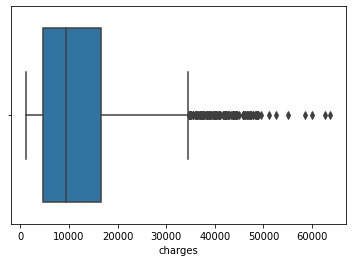

In [ ]:
charges_qrange,charges_upper,charges_lower = outlier_detection(dataset.charges,percentiles_charges)
print("Inter Quartile Range:",charges_qrange)
print("Outliers below lower bound:",np.where(charges_lower))
print("Outliers above upper bound:",np.where(charges_upper))
print("total number of outliers above upper bound:",len(np.where(charges_upper)[0]),"\n")
print(sns.boxplot(dataset.charges))


# 3h: Distribution of categorical columns (including children) 

Distribution of 'sex' column

In [ ]:
males = dataset.sex.apply(lambda x: x=='male')
females = dataset.sex.apply(lambda x: x=='female')

print("Number of males:",males.sum())
print("Number of females:",females.sum())

Number of males: 676
Number of females: 662


Distribution of 'children' column

In [ ]:
no_child = dataset.children.apply(lambda x: x==0)
one_child = dataset.children.apply(lambda x: x==1)
two_child = dataset.children.apply(lambda x: x==2)
three_child = dataset.children.apply(lambda x: x==3)
four_child = dataset.children.apply(lambda x: x==4)
five_child = dataset.children.apply(lambda x: x==5)

print("Number of children covered under heath insurance:")
print("no child covered:",no_child.sum())
print("one child covered:",one_child.sum())
print("two children covered:",two_child.sum())
print("three children covered:",three_child.sum())
print("four children covered:",four_child.sum())
print("five children covered:",five_child.sum())

Number of children covered under heath insurance:
no child covered: 574
one child covered: 324
two children covered: 240
three children covered: 157
four children covered: 25
five children covered: 18


Distribution of 'smoker' column

In [ ]:
non_smoker = dataset.smoker.apply(lambda x: x=='no')
smokes = dataset.smoker.apply(lambda x: x=='yes')

print("Number of individuals who don't smoke:",non_smoker.sum())
print("Number of individuals who smoke:",smokes.sum())

Number of individuals who don't smoke: 1064
Number of individuals who smoke: 274


Distribution of 'region' column

In [ ]:
northeast = dataset.region.apply(lambda x: x=='northeast')
southeast = dataset.region.apply(lambda x: x=='southeast')
southwest = dataset.region.apply(lambda x: x=='southwest')
northwest = dataset.region.apply(lambda x: x=='northwest')

print("beneficiary residing in northeast:",northeast.sum())
print("beneficiary residing in southeast:",southeast.sum())
print("beneficiary residing in southwest:",southwest.sum())
print("beneficiary residing in northwest:",northwest.sum())

beneficiary residing in northeast: 324
beneficiary residing in southeast: 364
beneficiary residing in southwest: 325
beneficiary residing in northwest: 325


# 3i: Pair plot that includes all the columns of the data frame 

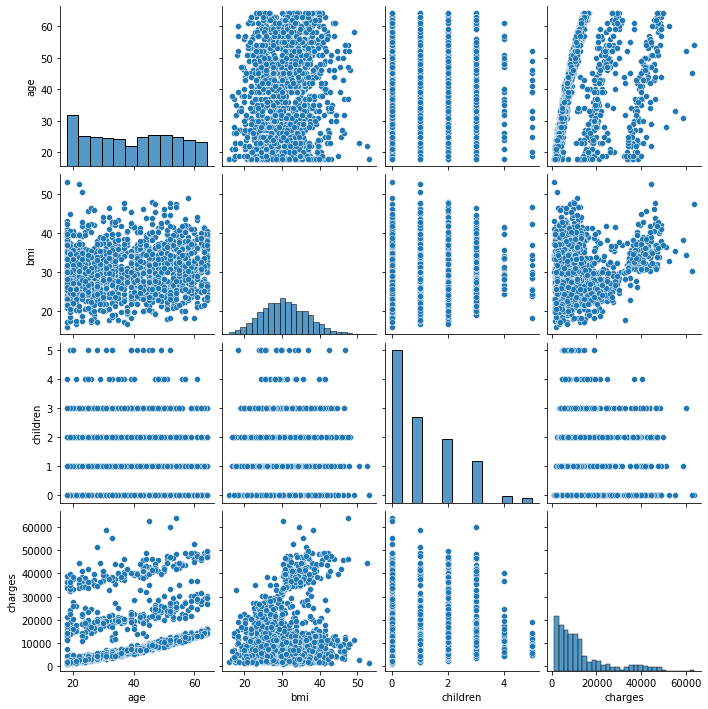

In [ ]:
print(sns.pairplot(dataset))

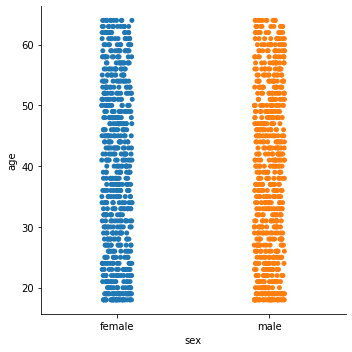

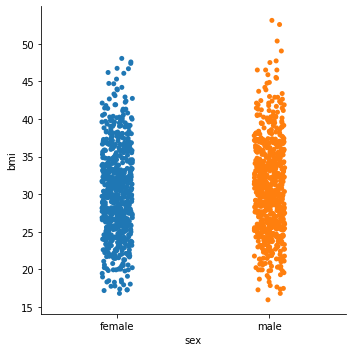

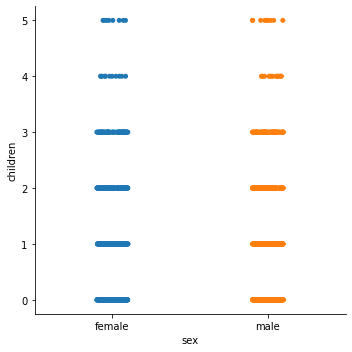

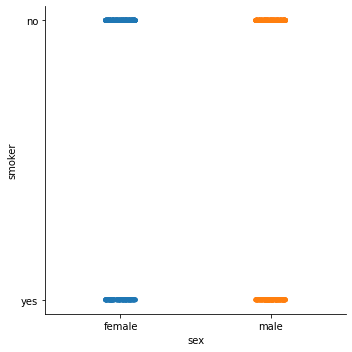

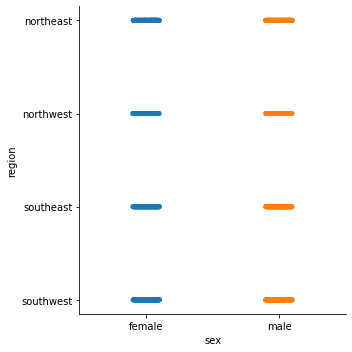

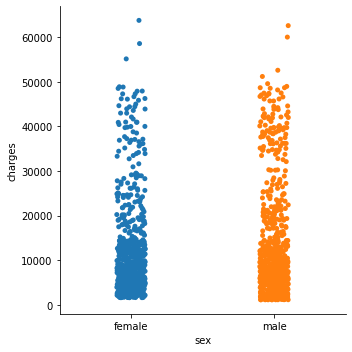

In [ ]:
# Pair plots with 'sex' column
sns.catplot(x='sex',y='age', data=dataset)
sns.catplot(x='sex',y='bmi',data= dataset)
sns.catplot(x='sex',y= 'children',data = dataset)
sns.catplot(x='sex',y='smoker',data = dataset)
sns.catplot(x='sex',y='region',data = dataset)
sns.catplot(x='sex',y='charges',data = dataset)

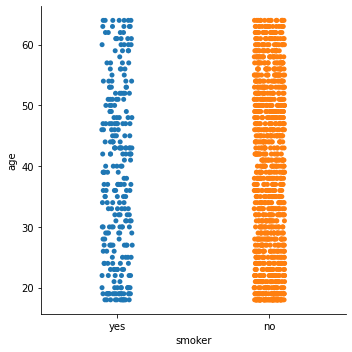

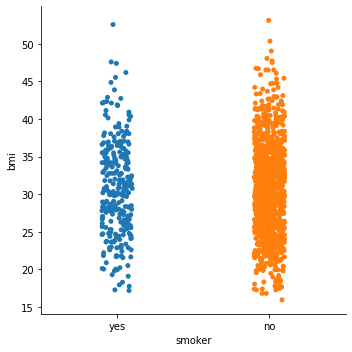

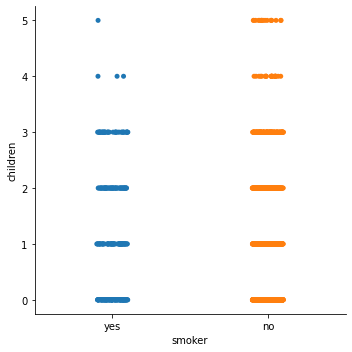

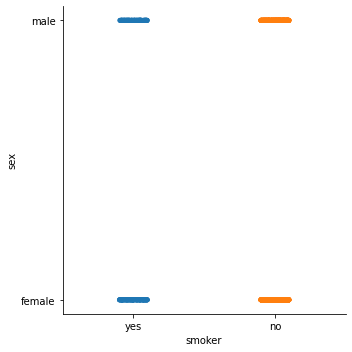

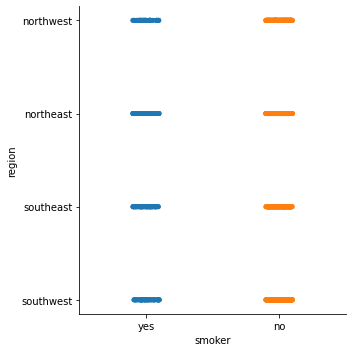

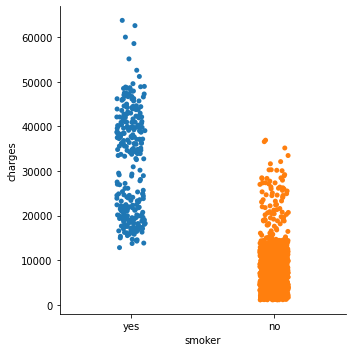

In [ ]:
# Pair plots with 'smoker' column
sns.catplot(x = 'smoker',y='age', data=dataset)
sns.catplot(x='smoker',y='bmi',data= dataset)
sns.catplot(x='smoker',y= 'children',data = dataset)
sns.catplot(x='smoker',y='sex',data = dataset)
sns.catplot(x='smoker',y='region',data = dataset)
sns.catplot(x='smoker',y='charges',data = dataset)

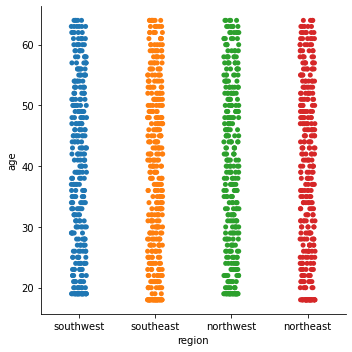

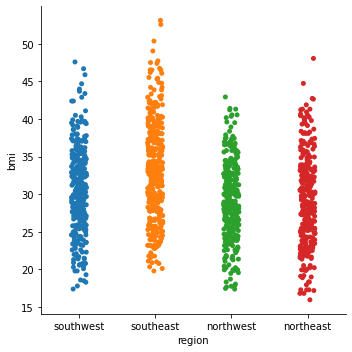

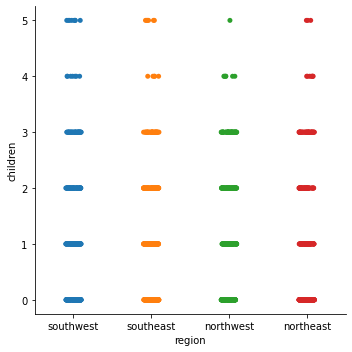

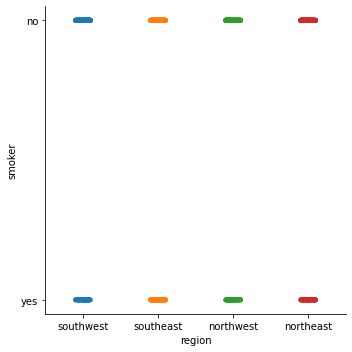

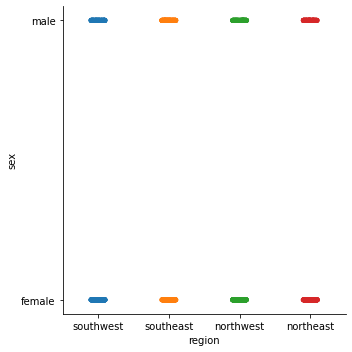

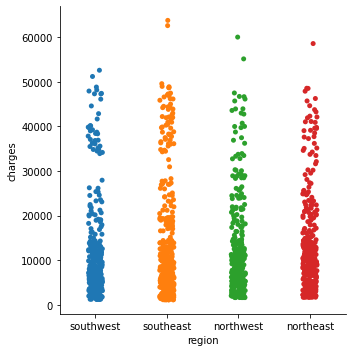

In [ ]:
# Pair plots with 'region' column
sns.catplot(x = 'region',y='age', data=dataset)
sns.catplot(x='region',y='bmi',data= dataset)
sns.catplot(x='region',y= 'children',data = dataset)
sns.catplot(x='region',y='smoker',data = dataset)
sns.catplot(x='region',y='sex',data = dataset)
sns.catplot(x='region',y='charges',data = dataset)

# 4a: Do charges of people who smoke differ significantly from the people who don't?
Answer: Yes, as can be seen in the cell below a smoker spends more than 32000 on a medical bill on average while a non smoker spends around than 8434, therefore a smoker spends almost 3.8 times more, which is a significant increase .
Other statistics are also present such as the maximum cost for a smoker is around 63770 while that for a non-smoker is 36910 which is 72% less.

In [ ]:
smoker_data = dataset[dataset.smoker == 'yes']
non_smoker_data = dataset[dataset.smoker == 'no']
smoker_percentile_charges = np.percentile(smoker_data.charges,[25,50,75])
non_smoker_percentile_charges = np.percentile(non_smoker_data.charges,[25,50,75])
min_smoker = smoker_data.charges.min()
max_smoker = smoker_data.charges.max()
min_nsmoke = smoker_data.charges.min()
max_nsmoke = non_smoker_data.charges.max()

print("minimum charge for someone who smokes:",min_smoker)
print("minimum charge of someone who don't smoke:",min_nsmoke,"\n")
print("maximum charge for someone who smokes:",max_smoker)
print("maximum charge of someone who don't smoke:",max_nsmoke,"\n")
print("[25th, median, 75th] percentiles of: ")
print("smokers:",smoker_percentile_charges)
print("non smokers:",non_smoker_percentile_charges)
print("\nAverage cost of smoker:", np.mean(smoker_data.charges))
print("Average cost of non-smoker:", np.mean(non_smoker_data.charges))

minimum charge for someone who smokes: 12829.4551
minimum charge of someone who don't smoke: 12829.4551 

maximum charge for someone who smokes: 63770.42801
maximum charge of someone who don't smoke: 36910.60803 

[25th, median, 75th] percentiles of: 
smokers: [20826.2442125 34456.34845   41019.207275 ]
non smokers: [ 3986.4387   7345.4053  11362.88705]

Average cost of smoker: 32050.23183153285
Average cost of non-smoker: 8434.268297856199


# 4b: Does bmi of males differ significantly from that of females?

Answer: No, bmi in males and females don't differ significantly. Average in males is 30.94 while in females it is 30.37. [25th, 50th, 75th] percentiles are also almost equal in both the cases. there is a difference in maximum values but that can be due to presence of outliers.

In [ ]:
data_males = dataset[dataset.sex=='male']
data_females = dataset[dataset.sex=='female']
males_percentile_bmi = np.percentile(data_males.bmi,[25,50,75])
females_percentile_bmi = np.percentile(data_females.bmi,[25,50,75])
min_males = data_males.bmi.min()
max_males = data_males.bmi.max()
min_females = data_females.bmi.min()
max_females = data_females.bmi.max()

print("Minimum of bmi in males:",min_males)
print("Maximum of bmi in males:",max_males)
print("\nMinimum of bmi in females:",min_females)
print("Maximum of bmi in females:",max_females)
print("\n[25th, median, 75th] percentiles of:")
print("males:",males_percentile_bmi)
print("females:", females_percentile_bmi)
print("\nAverage bmi of males:", np.mean(data_males.bmi))
print("Average bmi of females:", np.mean(data_females.bmi))

Minimum of bmi in males: 15.96
Maximum of bmi in males: 53.13

Minimum of bmi in females: 16.815
Maximum of bmi in females: 48.07

[25th, median, 75th] percentiles of:
males: [26.41   30.6875 34.9925]
females: [26.125   30.1075  34.31375]

Average bmi of males: 30.943128698224832
Average bmi of females: 30.377749244713023


# 4c: Is the proportion of smokers significantly different in different genders? 

Answer: Yes, there are almost 38% more smokers among males than females.

In [ ]:
smoker_males = smoker_data[smoker_data.sex=='male']
smoker_females = smoker_data[smoker_data.sex=='female']
num_male_smoker = len(smoker_males)
num_female_smoker = len(smoker_females)
print(num_male_smoker)
print(num_female_smoker)
print("Number of male smokers for every 100 female smokers:",100*(num_male_smoker/num_female_smoker))

159
115
Number of male smokers for every 100 female smokers: 138.2608695652174


# 4d: Is the distribution of bmi across women with no children, one child and two children, the same? 
Answer: Yes, as we can see in the statistics below there are no significant changes in the bmi of women with no children, one child and two children.
Mean, Median, Quartiles, Minimum, Maximum all of these values are almost similar.

In [ ]:
female_no_child = data_females[data_females.children == 0]
female_one_child = data_females[data_females.children == 1]
female_two_child = data_females[data_females.children == 2]

female_no_bmi = np.percentile(female_no_child.bmi,[25,50,75])
female_one_bmi = np.percentile(female_one_child.bmi,[25,50,75])
female_two_bmi = np.percentile(female_two_child.bmi,[25,50,75])

min_no_child = female_no_child.bmi.min()
max_no_child = female_no_child.bmi.max()
min_one_child = female_one_child.bmi.min()
max_one_child = female_one_child.bmi.max()
min_two_child = female_two_child.bmi.min()
max_two_child = female_two_child.bmi.max()


print("Minimum of bmi in no child males:",min_no_child)
print("Maximum of bmi in no child males:",max_no_child)
print("\nMinimum of bmi in one child females:",min_one_child)
print("Maximum of bmi in one child females:",max_one_child)
print("\nMinimum of bmi in two child females:",min_two_child)
print("Maximum of bmi in two child females:",max_two_child)
print("\n[25th, median, 75th] percentiles of: ")
print("no child:",female_no_bmi)
print("one child:",female_one_bmi)
print("two child:", female_two_bmi)
print("\nAverage bmi of no child females:", np.mean(female_no_child.bmi))
print("Average bmi of one child females:", np.mean(female_one_child.bmi))
print("Average bmi of two child females:", np.mean(female_two_child.bmi))

Minimum of bmi in no child males: 17.29
Maximum of bmi in no child males: 47.41

Minimum of bmi in one child females: 16.815
Maximum of bmi in one child females: 46.09

Minimum of bmi in two child females: 17.195
Maximum of bmi in two child females: 48.07

[25th, median, 75th] percentiles of: 
no child: [26.2   29.925 34.6  ]
one child: [25.9825 29.5675 33.9425]
two child: [25.77 31.3  34.75]

Average bmi of no child females: 30.361522491349486
Average bmi of one child females: 30.05265822784811
Average bmi of two child females: 30.64978991596637
